In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# 1. 더미 데이터 생성
np.random.seed(42)
data_size = 100  # 데이터의 크기

In [3]:
# 과목 점수 생성 (0에서 100 사이의 랜덤 값)
math_scores = np.random.randint(0, 101, data_size)
science_scores = np.random.randint(0, 101, data_size)
english_scores = np.random.randint(0, 101, data_size)


In [4]:
# 합격 여부 설정 (단순히 평균 점수가 60 이상인 경우 Pass, 그렇지 않으면 Fail)
pass_fail = ["Pass" if (math + science + english) / 3 >= 60 else "Fail"
             for math, science, english in zip(math_scores, science_scores, english_scores)]


In [5]:
# 데이터프레임 생성
df = pd.DataFrame({
    "Math": math_scores,
    "Science": science_scores,
    "English": english_scores,
    "Result": pass_fail
})


In [6]:
# 2. 문자열을 숫자로 변환
result_mapping = {"Pass": 1, "Fail": 0}
df["Result"] = df["Result"].map(result_mapping)

In [7]:
# 입력 데이터와 타겟 데이터 분리
X = df[["Math", "Science", "English"]]  # 특징 데이터 (과목 점수)
y = df["Result"]                        # 레이블 데이터 (합격 여부)

In [8]:
# 3. 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# 4. 의사결정 나무 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# 5. 테스트 데이터로 예측
y_pred = model.predict(X_test)

In [11]:
# 6. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy * 100:.2f}%")

모델 정확도: 76.67%


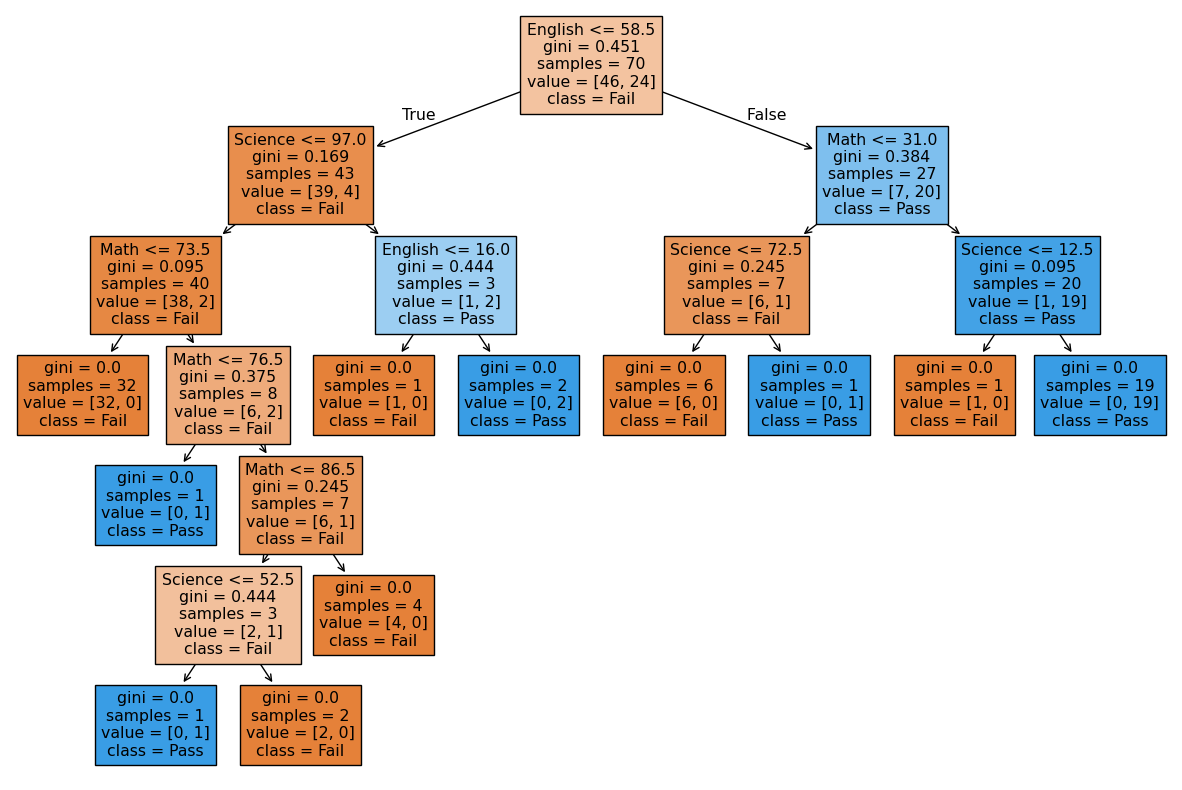

In [12]:
# 7. 시각화 (트리 구조)
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=["Math", "Science", "English"], class_names=["Fail", "Pass"], filled=True)
plt.show()

In [13]:
# 8. 새로운 데이터 예측
new_sample = [[70, 80, 90]]  # 예: 수학 70점, 과학 80점, 영어 90점
predicted_class = model.predict(new_sample)
result = "Pass" if predicted_class[0] == 1 else "Fail"
print(f"새로운 데이터의 예측 결과: {result}")

새로운 데이터의 예측 결과: Pass


c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
